<a href="https://colab.research.google.com/github/Son-github/DeepLearning_PyTroch/blob/main/DeepLearning_with_PyTorch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인공신경망**

파이토치로 단층 퍼셉트론 구현

In [1]:
import torch
import torch.nn as nn

device = 'cuda'
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [2]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0],[1], [1], [0]]).to(device)

In [4]:
import torch.nn as nn
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [5]:
criterion = torch.nn.BCELoss().to(device) # 이진 분류에서 사용하는 크로스엔트로피 함수
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [6]:
#10,001번의 에포트 수행. 0번 에포크부터 10,000번 에포크까지
for step in range(10001):
  optimizer.zero_grad()
  hypothesis = model(X)

  # cost function
  cost = criterion(hypothesis, Y)
  cost.backward()
  optimizer.step()

  if step % 100 == 0: # 100번째 에포크마다 비용 출력
    print(step, cost.item())

0 0.7273973822593689
100 0.6931475400924683
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

학습된 단층 퍼셉트론의 예측값 확인

In [7]:
with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == Y).float().mean()
  print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
  print('모델의 예측값(Hypothesis): ', predicted.detach().cpu().numpy())
  print('실제값(Y): ', hypothesis.detach().cpu().numpy())
  print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Hypothesis):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
정확도(Accuracy):  0.5


파이토치로 다층 퍼셉트론 구현

In [1]:
import torch
import torch.nn as nn
device = 'cuda'
torch.cuda.manual_seed_all(777)
torch.manual_seed(777)

In [2]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)


In [3]:
model = nn.Sequential(
    nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
    nn.Sigmoid()
).to(device)

In [4]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1) # modified learning rate from 0.1 to 1


In [5]:
for epoch in range(10001):
  optimizer.zero_grad()
  # forward
  hypothesis = model(X)

  # cost function
  cost = criterion(hypothesis, Y)
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(epoch, cost.item())

0 0.6948983669281006
100 0.693155825138092
200 0.6931535005569458
300 0.6931513547897339
400 0.6931492686271667
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416392326355
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931362152099609
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931196451187134
2000 0.6931171417236328
2100 0.6931145191192627
2200 0.6931116580963135
2300 0.6931085586547852
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930880546569824
2900 0.6930825114250183
3000 0.6930763125419617
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.6930411458015442
3500 0.693028450012207
3600 0.6930133104324341
3700 0.6929951906204224
3800 0.6929729580879211
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928649544715881
4200 0

In [6]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1169227e-04]
 [9.9982882e-01]
 [9.9984241e-01]
 [1.8534942e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


시그모이드 함수와 기울기 소실

In [7]:
import numpy as np
import matplotlib.pyplot as plt

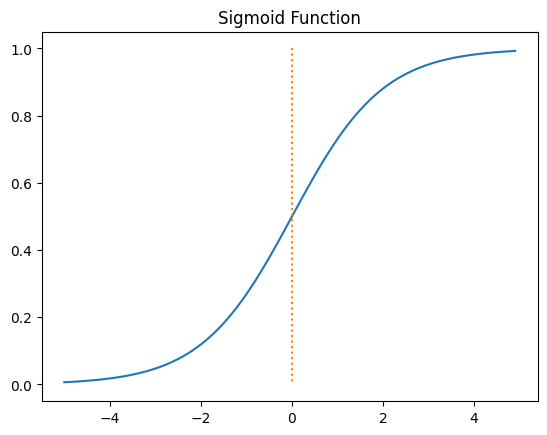

In [8]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

하이퍼볼릭단젠트 함수

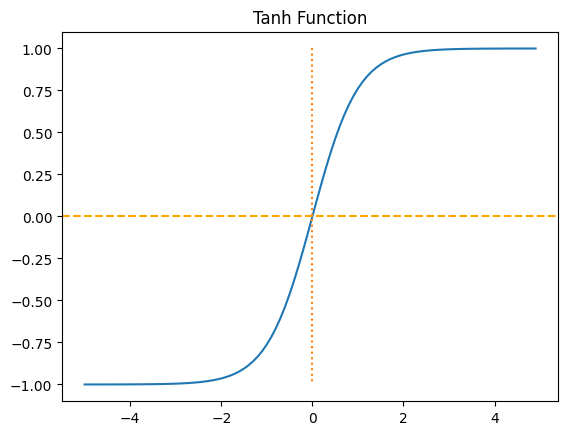

In [9]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()


렐루 함수

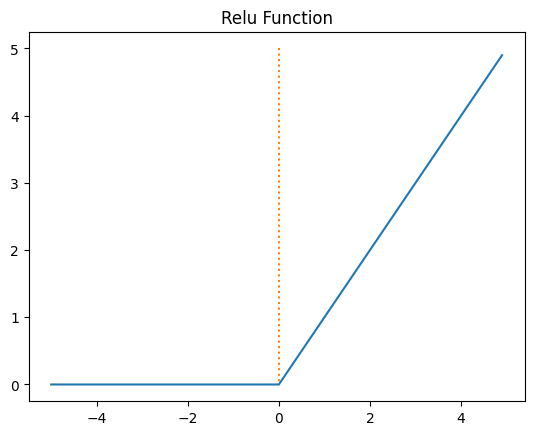

In [10]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

리키 렐루(Leaky ReLU)

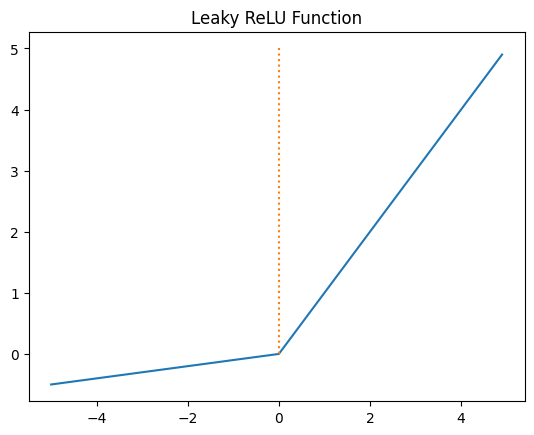

In [11]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

소프트맥스 함수

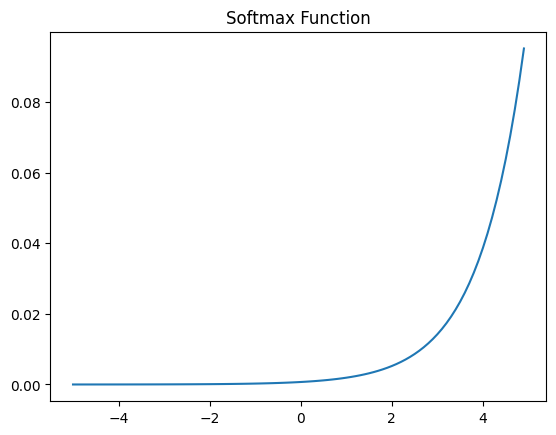

In [12]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

다층 퍼셉트론으로 손글씨 분류하기

In [2]:
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [3]:
print(digits.images[0]) # 첫번째 샘플 출력

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
print(digits.target[0])

0


In [5]:
print('전체 샘플의 수: {}'.format(len(digits.images)))

전체 샘플의 수: 1797


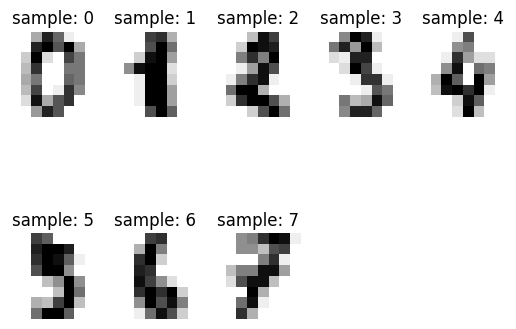

In [6]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
  plt.subplot(2, 5, index+1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('sample: %i' % label)

In [7]:
for i in range(5):
  print(i, '번 인덱스 샘플의 레이블: ', digits.target[i])

0 번 인덱스 샘플의 레이블:  0
1 번 인덱스 샘플의 레이블:  1
2 번 인덱스 샘플의 레이블:  2
3 번 인덱스 샘플의 레이블:  3
4 번 인덱스 샘플의 레이블:  4


In [8]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [9]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [10]:
import torch
import torch.nn as nn
from torch import optim

In [12]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [13]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [14]:
loss_fn = nn.CrossEntropyLoss()

In [15]:
optimizer = optim.Adam(model.parameters())

Epoch    0/100 Cost: 2.981326
Epoch   10/100 Cost: 2.189431
Epoch   20/100 Cost: 1.916942
Epoch   30/100 Cost: 1.616880
Epoch   40/100 Cost: 1.325676
Epoch   50/100 Cost: 1.042825
Epoch   60/100 Cost: 0.792884
Epoch   70/100 Cost: 0.593844
Epoch   80/100 Cost: 0.454613
Epoch   90/100 Cost: 0.361948


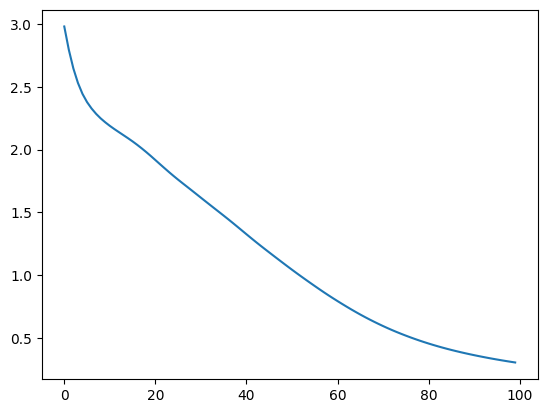

In [16]:
losses = []

for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X) # forwar 연산
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  losses.append(loss.item())

plt.plot(losses)

In [17]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.data[0]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [18]:
mnist.target[0]

'5'

In [20]:
import numpy as np
mnist.target = mnist.target.astype(np.int8)

X = mnist.data / 255 # 0~255값을 [0,1] 구간으로 정규화
Y = mnist.target

In [21]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
Y[0]

5

이 이미지 데이터의 레이블은 5이다


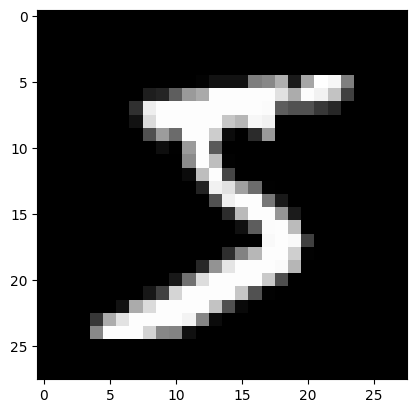

In [39]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(Y[0]))

In [25]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/7, random_state=0)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [46]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [47]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [48]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [49]:
test()


테스트 데이터에서 예측 정확도: 968/10000 (10%)



In [50]:
for epoch in range(3):
  train(epoch)

test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9574/10000 (96%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


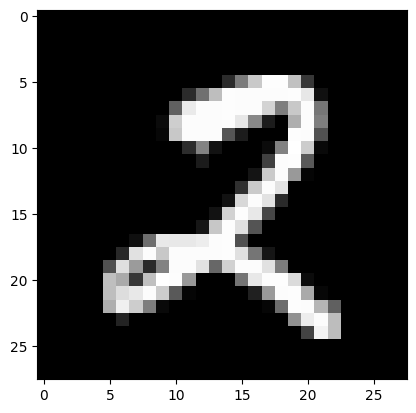

In [51]:
index = 2018

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))